# DBSCAN clustering

Given a point cloud from e.g. a depth sensor we want to group local point cloud clusters together. For this purpose, we can use clustering algorithms. Open3D implements DBSCAN [Ester1996] that is a density based clustering algorithm. The algorithm is implemented in cluster_dbscan and requires two parameters: eps defines the distance to neighbors in a cluster and min_points defines the minimum number of points required to form a cluster. The function returns labels, where the label -1 indicates noise.

In [1]:
import open3d as o3d 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import sys
# only needed for tutorial, monkey patches visualization
sys.path.append (' ..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

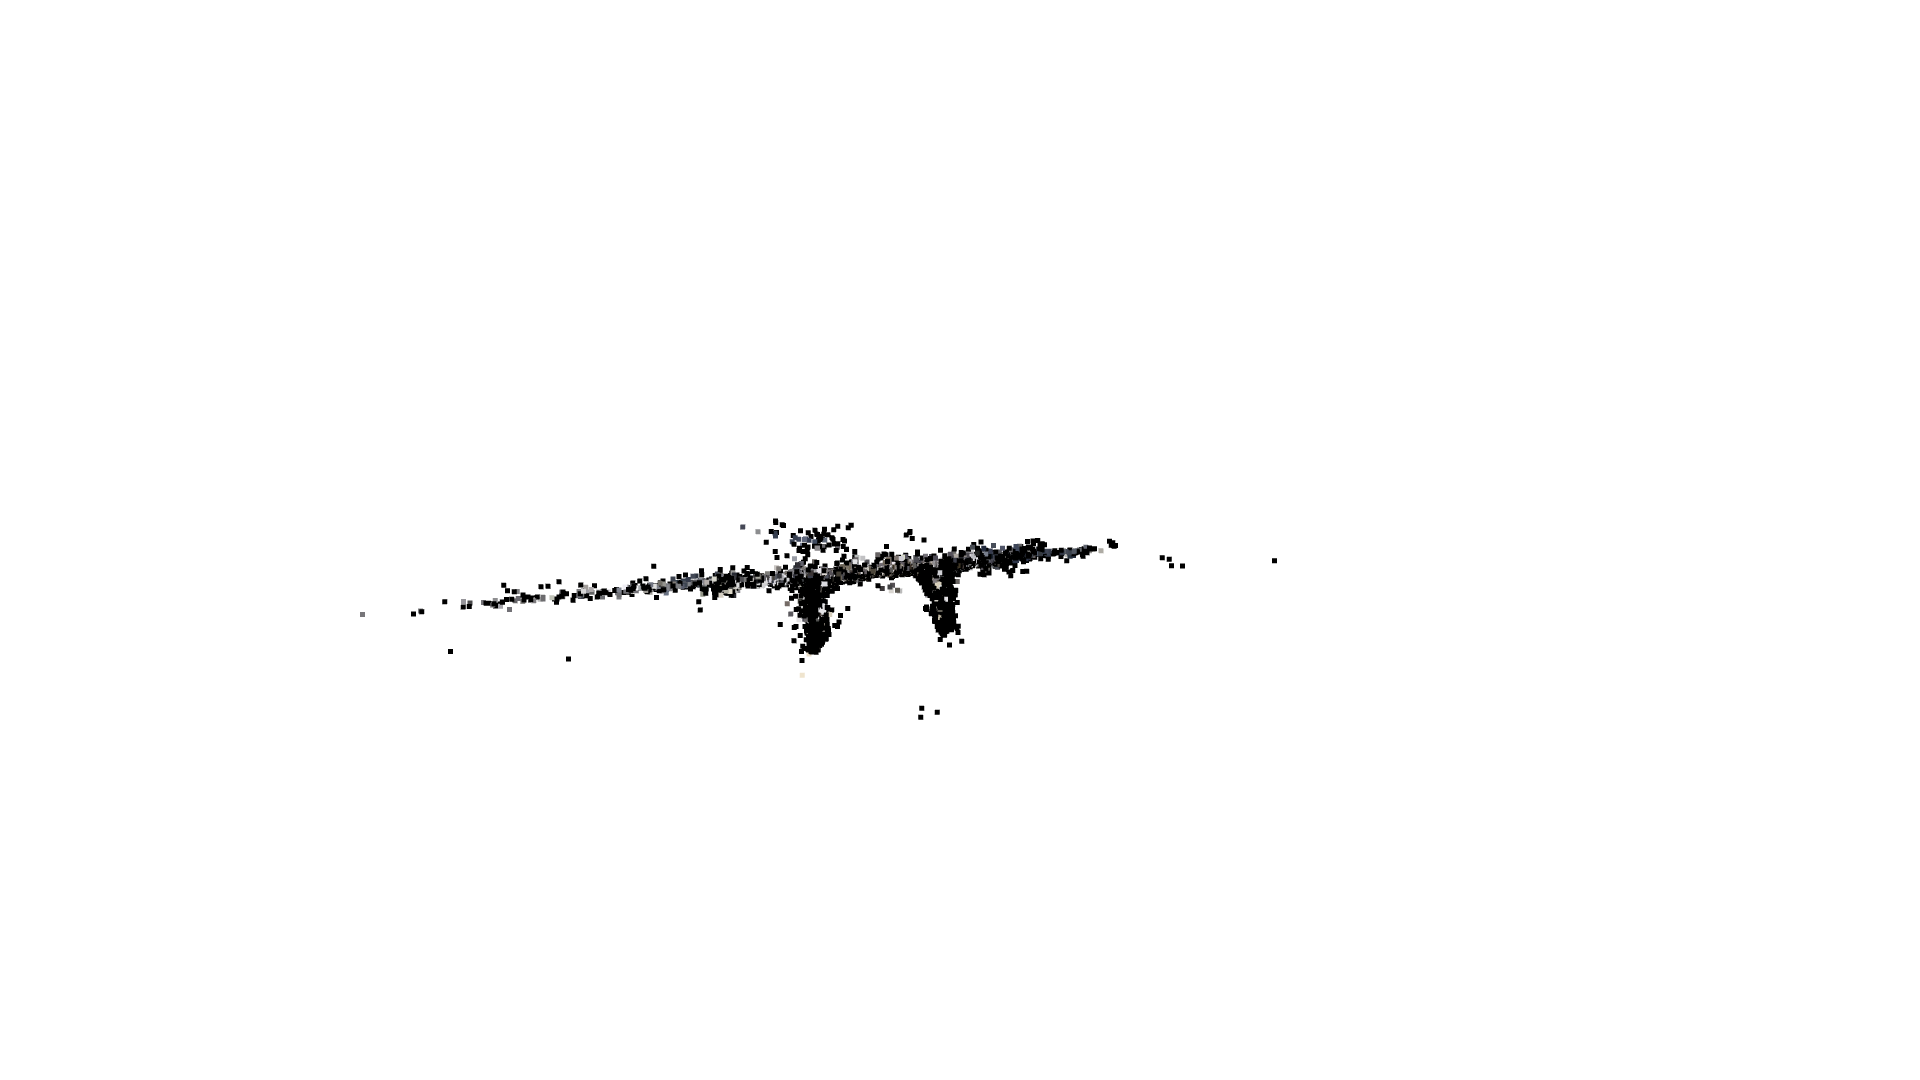

In [9]:
# Load point cloud
pcd = o3d.io.read_point_cloud("./model.ply")

# Visualize the point cloud
o3d.visualization.draw_geometries(
    [pcd],
    zoom=0.455,
    front=[-0.4999, -0.1659, -0.8499],
    lookat=[2.1813, 2.0619, 2.0999],
    up=[0.1204, -0.9852, 0.1215]
)

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.                     ] 2%
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 3
Precompute neighbors.[================>           point cloud has 3 clusters
Precompute neighbors.[========================================] 100%
Saved 3 clusters to ./clusters====================>] 97%
Visualizing ./clusters/cluster_0.ply


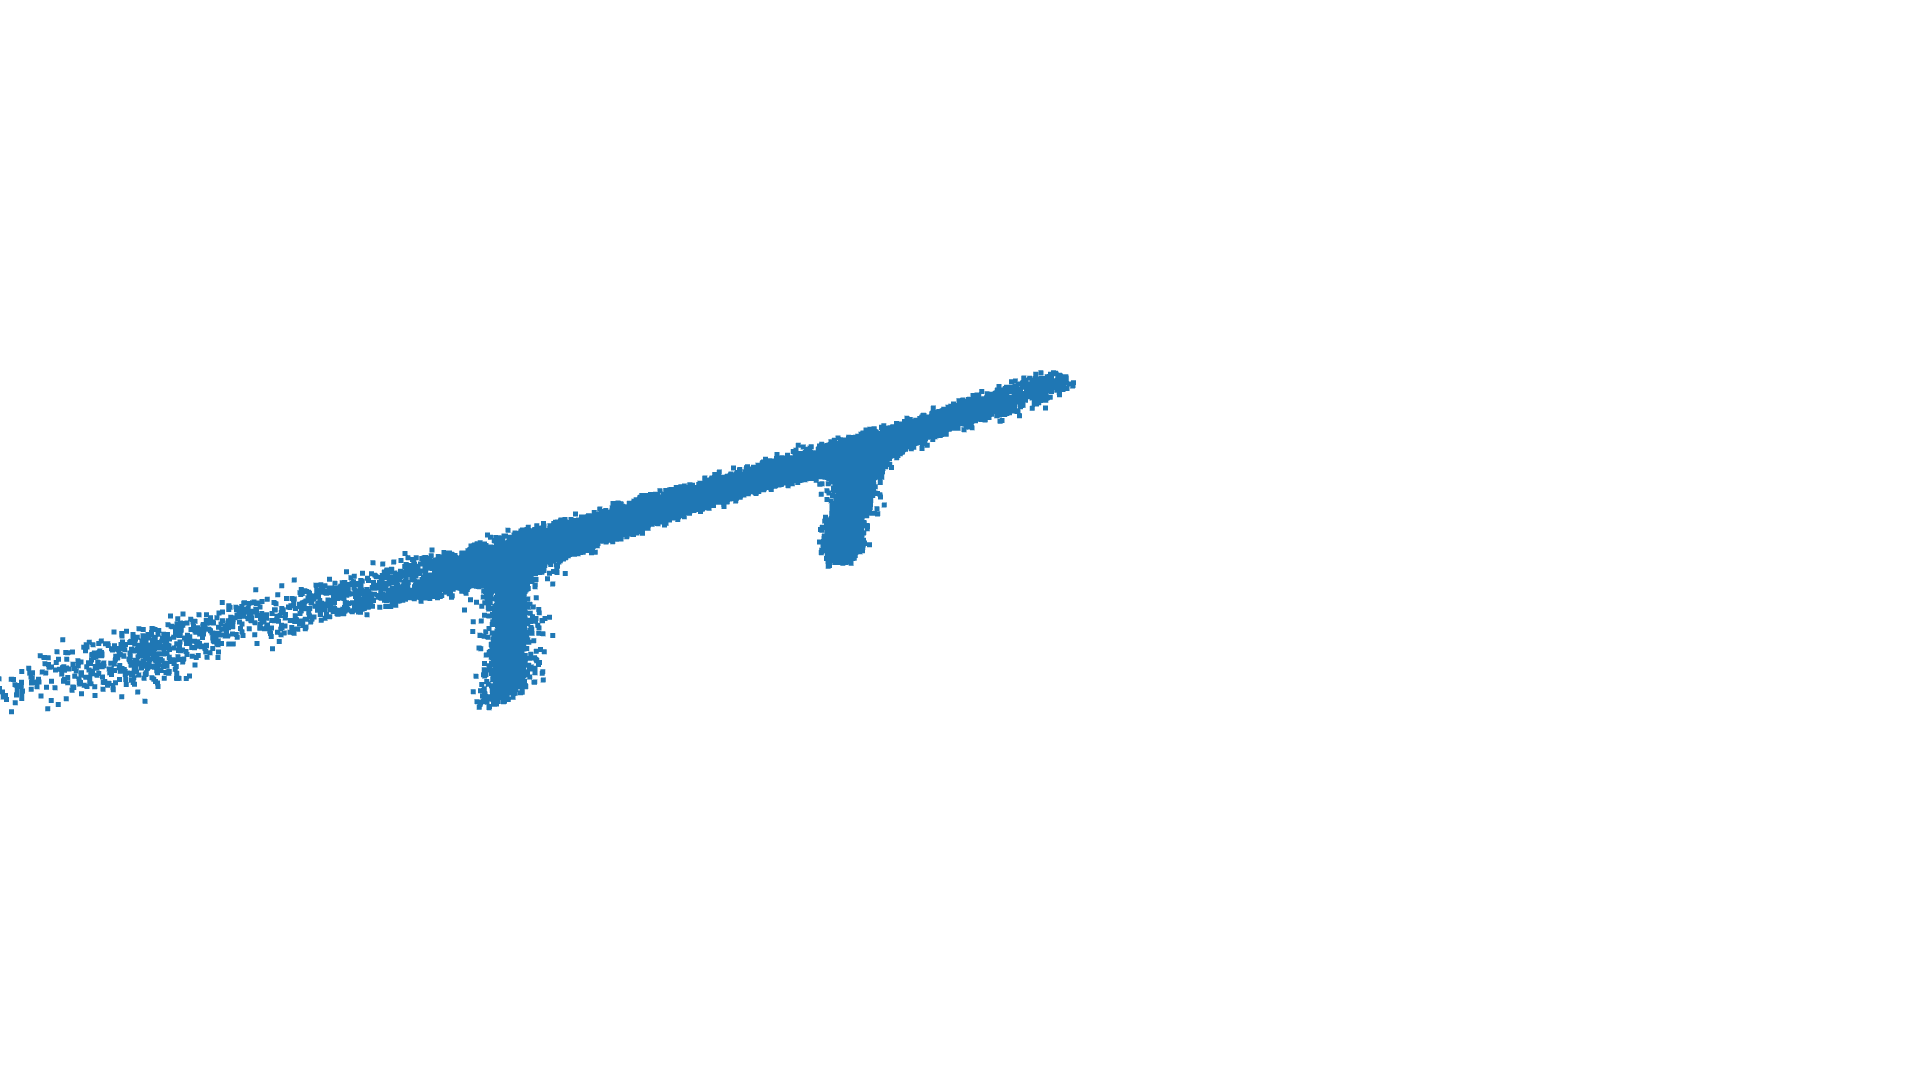

Visualizing ./clusters/cluster_1.ply


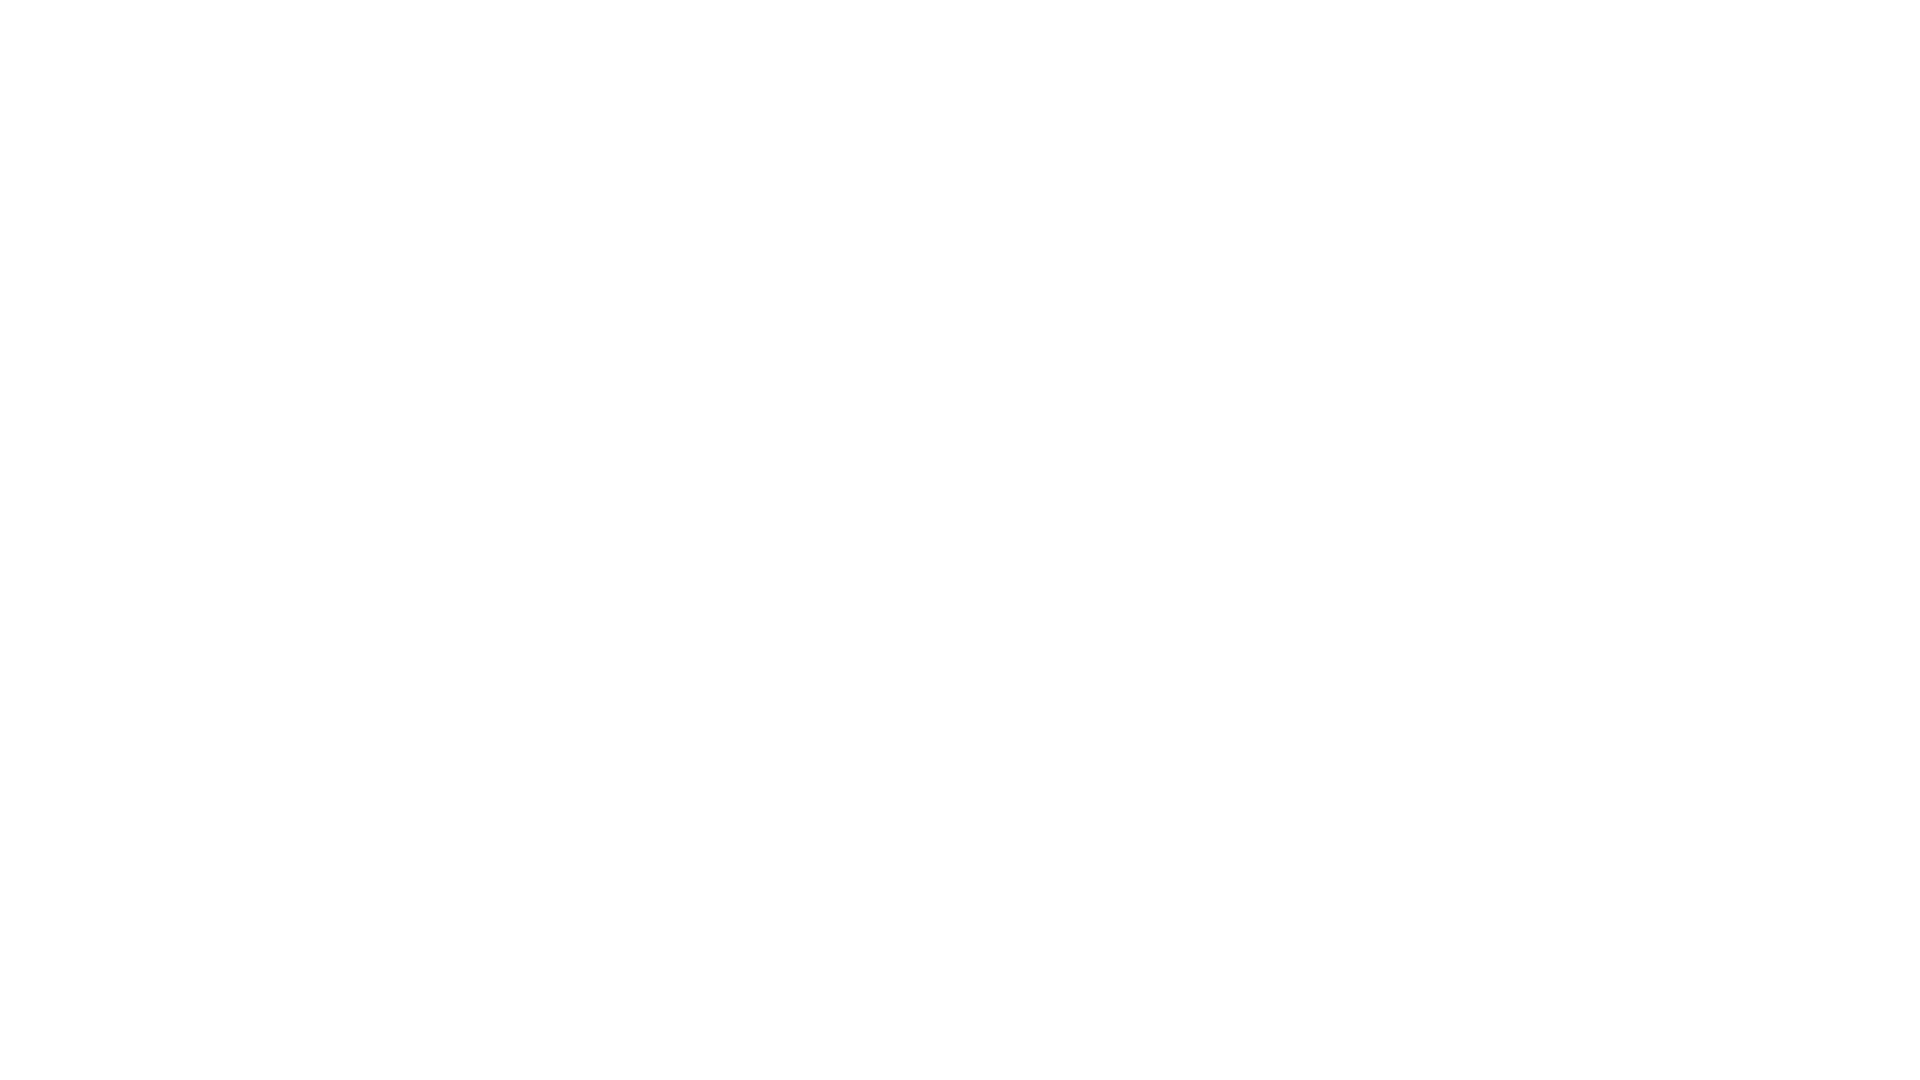

Visualizing ./clusters/cluster_2.ply


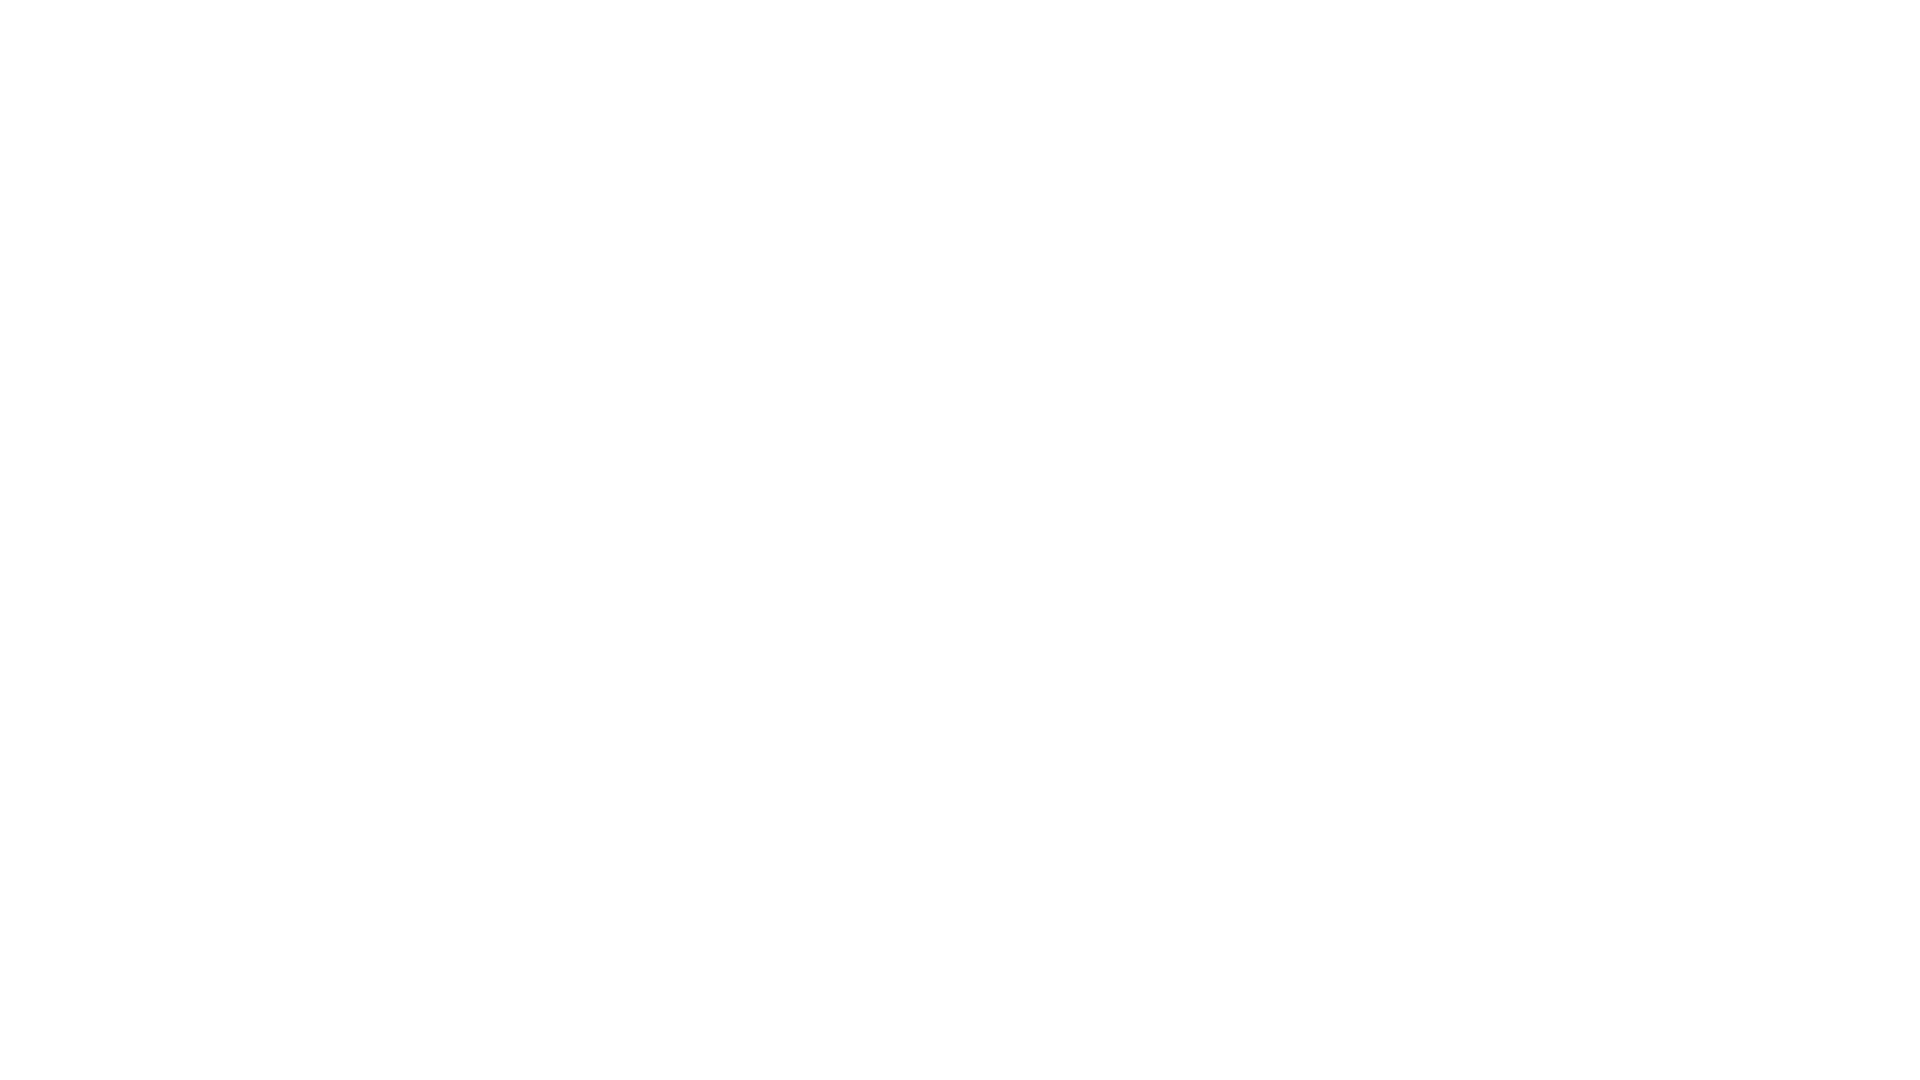

: 

In [11]:
# Perform DBSCAN clustering with verbosity level set to debug
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=0.3, min_points=10, print_progress=True))
    
# Calculate the number of clusters
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")

# Generate colors for visualization (not necessary for saving individual clusters)
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0 # Noise points are colored black
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

# Directory to save clusters
output_dir = "./clusters"
os.makedirs(output_dir, exist_ok=True)

# Extract and save each cluster
for i in range(max_label + 1):
    cluster_indices = np.where(labels == i)[0]
    cluster_pcd = pcd.select_by_index(cluster_indices)
    o3d.io.write_point_cloud(os.path.join(output_dir, f"cluster_{i}.ply"), cluster_pcd)

print(f"Saved {max_label + 1} clusters to {output_dir}")

# Visualize each saved cluster
for i in range(max_label + 1):
    cluster_file = os.path.join(output_dir, f"cluster_{i}.ply")
    cluster_pcd = o3d.io.read_point_cloud(cluster_file)
    print(f"Visualizing {cluster_file}")
    o3d.visualization.draw_geometries([cluster_pcd],
                                      zoom=0.455,
                                      front=[-0.4999, -0.1659, -0.8499],
                                      lookat=[2.1813, 2.0619, 2.0999],
                                      up=[0.1204, -0.9852, 0.1215])

Note:

This algorithm precomputes all neighbors in the epsilon radius for all points. This can require a lot of memory if the chosen epsilon is too large.